In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from pandas.tseries.offsets import QuarterEnd

%matplotlib inline

## Sales

In [250]:
sale = pd.read_csv('~/kamil_files/housing_datasets/sales/UK-HPI-full-file-2018-08.csv')

sale["Date"] = pd.to_datetime(sale["Date"], dayfirst=True).dt.date

In [251]:
sale.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


## Rent

In [226]:
rent = pd.read_excel('~/kamil_files/housing_datasets/rent/voa-average-rent-borough.xls',
                    sheetname = 'Data',header=[0,1,2])
rent = rent.reset_index()
rent.columns = rent.columns.droplevel(level=1)

rent = rent.loc[:, rent.columns.get_level_values(1).isin(['Average (£)','Area'])]
rent.columns = rent.columns.droplevel(level=1)
rent = rent.rename(columns={'Unnamed: 0_level_0':'area'})
rent.columns = ['-'.join(np.array(re.findall('(Q[0-9 ]+)', col)[0].split())[::-1]) if col !='area' else col for col in rent.columns]    

rent.head(2)

,area,2011-Q2,2011-Q3,2011-Q4,2012-Q1,2012-Q2,2012-Q3,2012-Q4,2013-Q1,2013-Q3,2014-Q1,2014-Q3,2015-Q1,2015-Q3,2016-Q1,2016-Q3,2017-Q1,2017-Q3
0,City of London,1713.08,1720.33,1640.874270,1830.0,1810.0,1960.0,1941.0,1848.0,1767.0,1958.0,1971.0,2194.0,2400.0,2249.0,2213.0,2163.0,2102.0
1,Barking and Dagenham,792.10,800.25,818.342455,835.0,851.0,866.0,892.0,902.0,921.0,864.0,895.0,965.0,1006.0,1099.0,1132.0,1171.0,1187.0


In [227]:
rent = rent.set_index('area').T.reset_index().rename(columns={'index':'qt'})
rent.columns.name = ''
rent = rent.dropna(axis=1, how='all')
rent['qt'] =  pd.to_datetime(rent['qt']) + QuarterEnd(0)
rent.head(2)

,qt,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West,England
0,2011-06-30,1713.08,792.10,1201.85,795.08,1218.22,983.26,1756.75,842.68,1093.05,...,477.58,519.55,496.47,509.44,533.15,654.86,1265.41,807.72,638.65,693.76
1,2011-09-30,1720.33,800.25,1257.84,807.11,1241.63,1021.31,1821.18,858.71,1122.56,...,477.69,521.10,509.03,510.24,530.91,651.97,1286.35,815.26,646.65,695.88


## Comparison between two London Councils

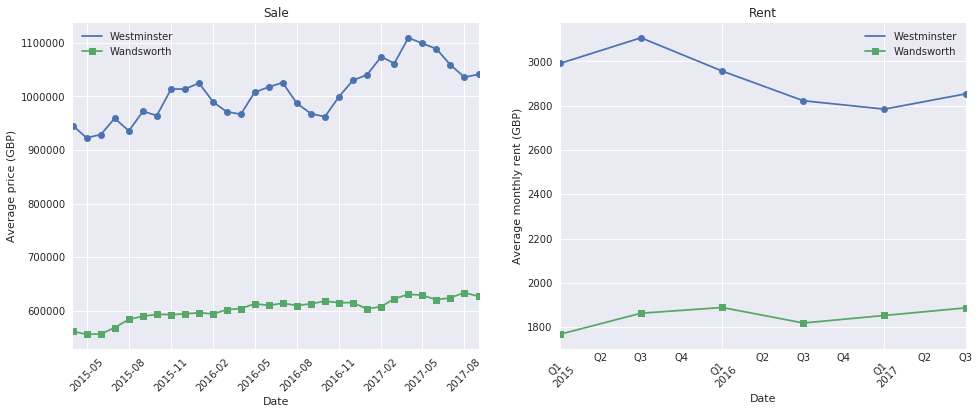

In [262]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    #sns.pointplot(x='Date', y='AveragePrice', 
    #              data=df[(df.RegionName=='City of Westminster') & 
    #                      (df.Date>= datetime.date(2017,1,1))], markers='', ax=ax)

    sale[(sale.RegionName=='City of Westminster') & (sale.Date>= datetime.date(2015,3,31))
       & (sale.Date<= datetime.date(2017,9,30))].plot(x='Date',y='AveragePrice', ax=ax[0], label = 'Westminster', marker='o')
    sale[(sale.RegionName=='Wandsworth') & (sale.Date>= datetime.date(2015,3,31))
       & (sale.Date<= datetime.date(2017,9,30))].plot(x='Date',y='AveragePrice', ax=ax[0], label = 'Wandsworth', marker='s')

    ax[0].set(title='Sale', xlabel='Date', ylabel='Average price (GBP)')


    rent.loc[(rent.qt >= datetime.date(2015,1,1))].plot(x='qt',y='Westminster', ax=ax[1], label = 'Westminster', marker='o')
    rent.loc[(rent.qt >= datetime.date(2015,1,1))].plot(x='qt',y='Wandsworth', ax=ax[1], label = 'Wandsworth', marker='s')
    ax[1].set(title='Rent', xlabel='Date', ylabel='Average monthly rent (GBP)')




    for tick in ax[0].get_xticklabels():
            tick.set_rotation(45)

    for tick in ax[1].get_xticklabels():
            tick.set_rotation(45)

In [24]:
#sales_18 = pd.read_csv("http://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/England-annual-price-change-by-London-Borough-2018-08.csv?utm_medium=GOV.UK&utm_source=govuk&utm_campaign=England_annual_price_change_by_London_Borough_2018_08&utm_term=17_10_18&utm_content=web_page")
#sales_17 = pd.read_csv("http://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/England-annual-price-change-by-London-Borough-2017-12.csv?utm_medium=GOV.UK&utm_source=govuk&utm_campaign=England_annual_price_change_by_London_Borough_2017_12&utm_term=13_02_18&utm_content=web_page")

In [7]:
#df = df.rename(columns={'August 2018':'aug_18', 'August 2017':'aug_17'})
#df['aug_18'] = df.aug_18.str.findall('[0-9].*').apply(lambda x: x[0] if x else None)
#df['aug_17'] = df.aug_17.str.findall('[0-9].*').apply(lambda x: x[0] if x else None)